[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PUBPOL-2130/projects/blob/main/P3/P3.ipynb)

# Relationship Between Neighborhood Wealth and Arrest Rates Across New York City Precincts  

This review looks at how neighborhood wealth relates to arrest rates across NYPD precincts, using 2023 arrest data and population figures from the ACS. The aim is to see how income levels may shape policing patterns across New York City’s five boroughs.

By highlighting data products with information about all five burroughs and consequent socioeconomic and demographic breakdowns, we will be able to determine the degree of relationship that exists between wealth and arrest rates in New York City.

# Background

The connection between arrest rates and wealth builds on longstanding research around structural inequality. A consistent finding across studies is that lower-income neighborhoods face higher rates of both crime and police interaction. In New York City, this is especially clear. Esri’s interactive StoryMap shows how arrests are heavily concentrated in areas with high poverty, particularly across parts of the Bronx and Brooklyn [2]. The overlap between income levels and arrest data points to how neighborhood wealth directly affects exposure to the criminal justice system. These are not isolated examples—they reflect a broader pattern in how cities operate.
The NYU Furman Center adds to this by showing that lower-income precincts not only have more arrests but also see a stronger and more visible police presence [4][8]. This means people living in poorer neighborhoods are more likely to encounter police, whether or not any crime has occurred. From a legal standpoint, Arthur Pressman notes that drug-related arrests in poor communities stem from both a lack of opportunity and more constant police surveillance [1]. In other words, it's not simply that crime happens more often in these areas, but that enforcement is more concentrated. Policing itself becomes part of the social environment in low-income neighborhoods, shaping who gets arrested and how often.
Evidence from outside New York supports this relationship too. McNamara’s work on Michigan counties found that places with higher median household incomes had consistently lower juvenile arrest rates [16]. That held true even after accounting for race, politics, and other contextual factors, suggesting that economic conditions alone carry significant weight. Wealthier communities likely will have more resources for things like education and healthcare which can reduce both crime and the need for aggressive policing. They also tend to have more influence over local governance, which may impact how police are deployed. Taken together, these findings suggest that arrest rates don’t just reflect individual behavior. They are tied to broader neighborhood conditions, and wealthier communities are simply policed differently. This raises important questions about how structural factors rather than personal choices actually shape who ends up in contact with the criminal justice system.


# Racial Disparities
Wealth and race don’t operate separately when it comes to policing. In New York City, arrest and incarceration rates disproportionately affect Black and Hispanic communities, even when these groups make up a smaller share of the overall population. The Prison Policy Initiative highlights how these patterns hold across the country, and city-specific reports back it up. For example, the Data Collaborative for Justice found that in NYC zip codes where median household income is below $35,000, 97 percent of criminal summonses went to Black and Hispanic residents, despite these groups only making up 44 percent of the population in those areas [5][7]. That kind of disparity doesn’t happen by accident—it suggests a deeper structure in how law enforcement interacts with different communities.
This pattern shows up elsewhere too. The NYC Council’s “Fix the System” project reports that 87 percent of the city’s jail population is Black or Latinx, and that most of these cases originate from the same relatively small group of low-income precincts [11]. In other words, a large portion of the city’s arrests come from a small slice of its geography. The NYPD Monitor’s 2024 report also found that stop-and-frisk practices are still disproportionately applied in majority-Black and Hispanic neighborhoods, even when crime rates are comparable to other parts of the city [12]. These enforcement decisions compound with the effects of poverty. Residents in these areas not only face more surveillance but are also more likely to be prosecuted, creating a feedback loop where both poverty and racial identity heighten risk.
At the same time, not all researchers agree on how to interpret these disparities. Heather Mac Donald, for instance, argues that the link between poverty and violent crime is overstated, and that cultural and behavioral explanations should be given more attention [3]. Her perspective pushes back against the assumption that economic conditions are the main driver. Meanwhile, Harry Levine’s research into marijuana enforcement suggests that arrests are often less about who is committing a crime and more about where the crime takes place and how enforcement is targeted [11]. That means racial and neighborhood profiling may be doing more to shape arrest statistics than actual differences in criminal behavior. These kinds of critiques challenge some of the assumptions in the broader literature, forcing a closer look at the methods and motivations behind enforcement patterns.
Together, these sources don’t offer a single explanation, but rather open up a more complicated picture. Race, income, geography, and enforcement policy all intersect in ways that shape who ends up arrested and why. It’s not just about whether someone broke the law. It’s also about where they live, how their neighborhood is policed, and what kinds of assumptions are made about them by the system. That complexity makes it difficult to draw clean lines between cause and effect and correlation but it’s also what makes the issue worth studying more closely.


In [1]:
!pip install -q folium scikit-learn census seaborn geopandas

In [2]:
!pip install sodapy pandas

from sodapy import Socrata
import pandas as pd
client = Socrata("data.cityofnewyork.us", None)

In [3]:
# Load first 5 rows to check column names
results = client.get("uip8-fykc", limit=5)
df = pd.DataFrame.from_records(results)

In [4]:
all_results = []
offset = 0
while True:
    batch = client.get(
        "8h9b-rp9u",
        where="arrest_date >= '2024-01-01T00:00:00.000' AND arrest_date <= '2024-12-31T23:59:59.999'",
        limit=1000,
        offset=offset
    )
    if not batch:
        break
    all_results.extend(batch)
    offset += 1000

df_2023 = pd.DataFrame.from_records(all_results)

In [5]:
renamed_df_2023 = df_2023[['arrest_date', 'pd_desc', 'ofns_desc', 'arrest_boro', 'arrest_precinct', 'age_group', 'perp_sex', 'perp_race']]

# Bronx

In [6]:
# ACS Data

!pip install -q census us folium geopandas colorcet
%config InlineBackend.figure_formats = ["retina"]

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import folium
import colorcet as cc

from census import Census
census = Census("", year=2023)

In [7]:
county_gdf = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2024/COUNTY/tl_2024_us_county.zip").set_index("GEOID")
county_gdf.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
GEOID,,,,,,,,,,,,,,,,,,
31039,31,039,00835841,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563042,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55525 41.82892, -96.55524 41.827..."
53069,53,069,01513275,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980773,61564428,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26..."
35011,35,011,00933054,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818941,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
31109,31,109,00835876,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269508,22850511,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.5233, -96.69219 40.5231..."
31129,31,129,00835886,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645201,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.2737 40.1184, -98.27374 40.1224,..."


In [8]:
# Creating FIPS code column to Arrest Dataset

borough_fips = {
  'M': '061',
  'K': '047',
  'B': '005',
  'Q': '081',
  'S': '085'
}

# Map each borough to its FIPS code then prepend the state FIPS code to create new column: GEOID

df_2023['COUNTYFP'] = df_2023['arrest_boro'].map(borough_fips)
df_2023['GEOID']    = '36' + df_2023['COUNTYFP']

df_2023

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,lon_lat,COUNTYFP,GEOID
0,279791318,2024-01-01T00:00:00.000,705,"FORGERY,ETC.-MISD.",358,OFFENSES INVOLVING FRAUD,PL 1702000,M,B,42,...,25-44,M,WHITE HISPANIC,1009517,243117,40.83393918636223,-73.90869231647055,"{'type': 'Point', 'coordinates': [-73.90869231...",005,36005
1,279789893,2024-01-01T00:00:00.000,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,106,...,45-64,M,ASIAN / PACIFIC ISLANDER,1028604,187929,40.682389,-73.840079,"{'type': 'Point', 'coordinates': [-73.840079, ...",081,36081
2,279794794,2024-01-01T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,14,...,25-44,M,WHITE,987111,212421,40.749725,-73.989674,"{'type': 'Point', 'coordinates': [-73.989674, ...",061,36061
3,279779821,2024-01-01T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,Q,110,...,25-44,M,WHITE HISPANIC,1018352,211952,40.74837004850126,-73.8769234357984,"{'type': 'Point', 'coordinates': [-73.87692343...",081,36081
4,279784122,2024-01-01T00:00:00.000,209,"BURGLARS TOOLS,UNCLASSIFIED",231,BURGLAR'S TOOLS,PL 1403500,M,K,60,...,25-44,M,WHITE,989590,150336,40.579314,-73.980773,"{'type': 'Point', 'coordinates': [-73.980773, ...",047,36047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260498,298703584,2024-12-31T00:00:00.000,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,M,14,...,25-44,M,WHITE HISPANIC,987044,213239,40.751978,-73.989915,"{'type': 'Point', 'coordinates': [-73.989915, ...",061,36061
260499,298694773,2024-12-31T00:00:00.000,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,B,42,...,25-44,M,BLACK,1010240,238959,40.822534,-73.906096,"{'type': 'Point', 'coordinates': [-73.906096, ...",005,36005
260500,298679856,2024-12-31T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200512,F,B,40,...,25-44,F,WHITE HISPANIC,1007046,236603,40.81606683945181,-73.91764392674679,"{'type': 'Point', 'coordinates': [-73.91764392...",005,36005
260501,298699274,2024-12-31T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,M,32,...,25-44,F,BLACK,998348,235496,40.813056,-73.949068,"{'type': 'Point', 'coordinates': [-73.949068, ...",061,36061


In [9]:
# Merging the Arrest DataFrame with the ACS DataFrame using the newly created GEOID column

merged_df = df_2023.merge(county_gdf, on='GEOID', how='left')
merged_df

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,279791318,2024-01-01T00:00:00.000,705,"FORGERY,ETC.-MISD.",358,OFFENSES INVOLVING FRAUD,PL 1702000,M,B,42,...,G4020,408,35620,35614,C,109235672,39353304,+40.8487111,-073.8529390,"POLYGON ((-73.93381 40.88221, -73.93365 40.882..."
1,279789893,2024-01-01T00:00:00.000,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,106,...,G4020,408,35620,35614,C,281594051,188444349,+40.6546581,-073.8412089,"POLYGON ((-74.03813 40.53829, -74.03749 40.542..."
2,279794794,2024-01-01T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,14,...,G4020,408,35620,35614,C,58683879,29010416,+40.7766419,-073.9701871,"MULTIPOLYGON (((-74.04721 40.69089, -74.04719 ..."
3,279779821,2024-01-01T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,Q,110,...,G4020,408,35620,35614,C,281594051,188444349,+40.6546581,-073.8412089,"POLYGON ((-74.03813 40.53829, -74.03749 40.542..."
4,279784122,2024-01-01T00:00:00.000,209,"BURGLARS TOOLS,UNCLASSIFIED",231,BURGLAR'S TOOLS,PL 1403500,M,K,60,...,G4020,408,35620,35614,C,179684481,71158757,+40.6350451,-073.9506398,"POLYGON ((-74.05647 40.63172, -74.05626 40.637..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260498,298703584,2024-12-31T00:00:00.000,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,M,14,...,G4020,408,35620,35614,C,58683879,29010416,+40.7766419,-073.9701871,"MULTIPOLYGON (((-74.04721 40.69089, -74.04719 ..."
260499,298694773,2024-12-31T00:00:00.000,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,B,42,...,G4020,408,35620,35614,C,109235672,39353304,+40.8487111,-073.8529390,"POLYGON ((-73.93381 40.88221, -73.93365 40.882..."
260500,298679856,2024-12-31T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200512,F,B,40,...,G4020,408,35620,35614,C,109235672,39353304,+40.8487111,-073.8529390,"POLYGON ((-73.93381 40.88221, -73.93365 40.882..."
260501,298699274,2024-12-31T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,M,32,...,G4020,408,35620,35614,C,58683879,29010416,+40.7766419,-073.9701871,"MULTIPOLYGON (((-74.04721 40.69089, -74.04719 ..."


In [10]:
# Get median household income for every NY county

c = Census("", year=2023)
income_vars = ["B19013_001E"]  # Median household income code
raw_income = c.acs5.state_county(income_vars, '36', Census.ALL)

# Turn it into a DataFrame and build the GEOID

income_df = pd.DataFrame(raw_income)
income_df['GEOID'] = income_df['state'] + income_df['county']
income_df = (
    income_df
    .set_index('GEOID')
    .rename(columns={"B19013_001E": "median_income"})
    ["median_income"]
)

# Merge the median income DataFrame to the already merged DataFrame

merged = merged_df.merge(
    income_df,
    left_on='GEOID',
    right_index=True,
    how='left'
)

merged[['GEOID','arrest_boro','median_income']].drop_duplicates().head()

,GEOID,arrest_boro,median_income
0,36005,B,49036.0
1,36081,Q,84961.0
2,36061,M,104553.0
4,36047,K,78548.0
5,36085,S,98290.0


In [11]:
# Read the shapefile into a GeoDataFrame
#boroughs = gpd.read_file('nybb.shp')
!curl -L -o nybb_25a.zip https://github.com/PUBPOL-2130/projects/raw/main/P3/nybb_25a.zip
!unzip -o nybb_25a.zip -d nybb_data
boroughs = gpd.read_file("nybb_data/nybb.shp")

# Convert to a plain pandas DataFrame (drop the geometry)
df = pd.DataFrame(boroughs.drop(columns='geometry'))

print(df.columns)
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  715k  100  715k    0     0  1092k      0 --:--:-- --:--:-- --:--:-- 1092k
Archive:  nybb_25a.zip
  inflating: nybb_data/nybb.dbf      
  inflating: nybb_data/nybb.prj      
  inflating: nybb_data/nybb.shp.xml  
  inflating: nybb_data/nybb.shx      
  inflating: nybb_data/nybb.shp      
Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area'], dtype='object')


,BoroCode,BoroName,Shape_Leng,Shape_Area
0,5,Staten Island,325910.306061,1.623619e+09
1,2,Bronx,463180.579257,1.187175e+09
2,4,Queens,887913.109699,3.041418e+09
3,1,Manhattan,360037.634379,6.366460e+08
4,3,Brooklyn,728148.996409,1.934142e+09


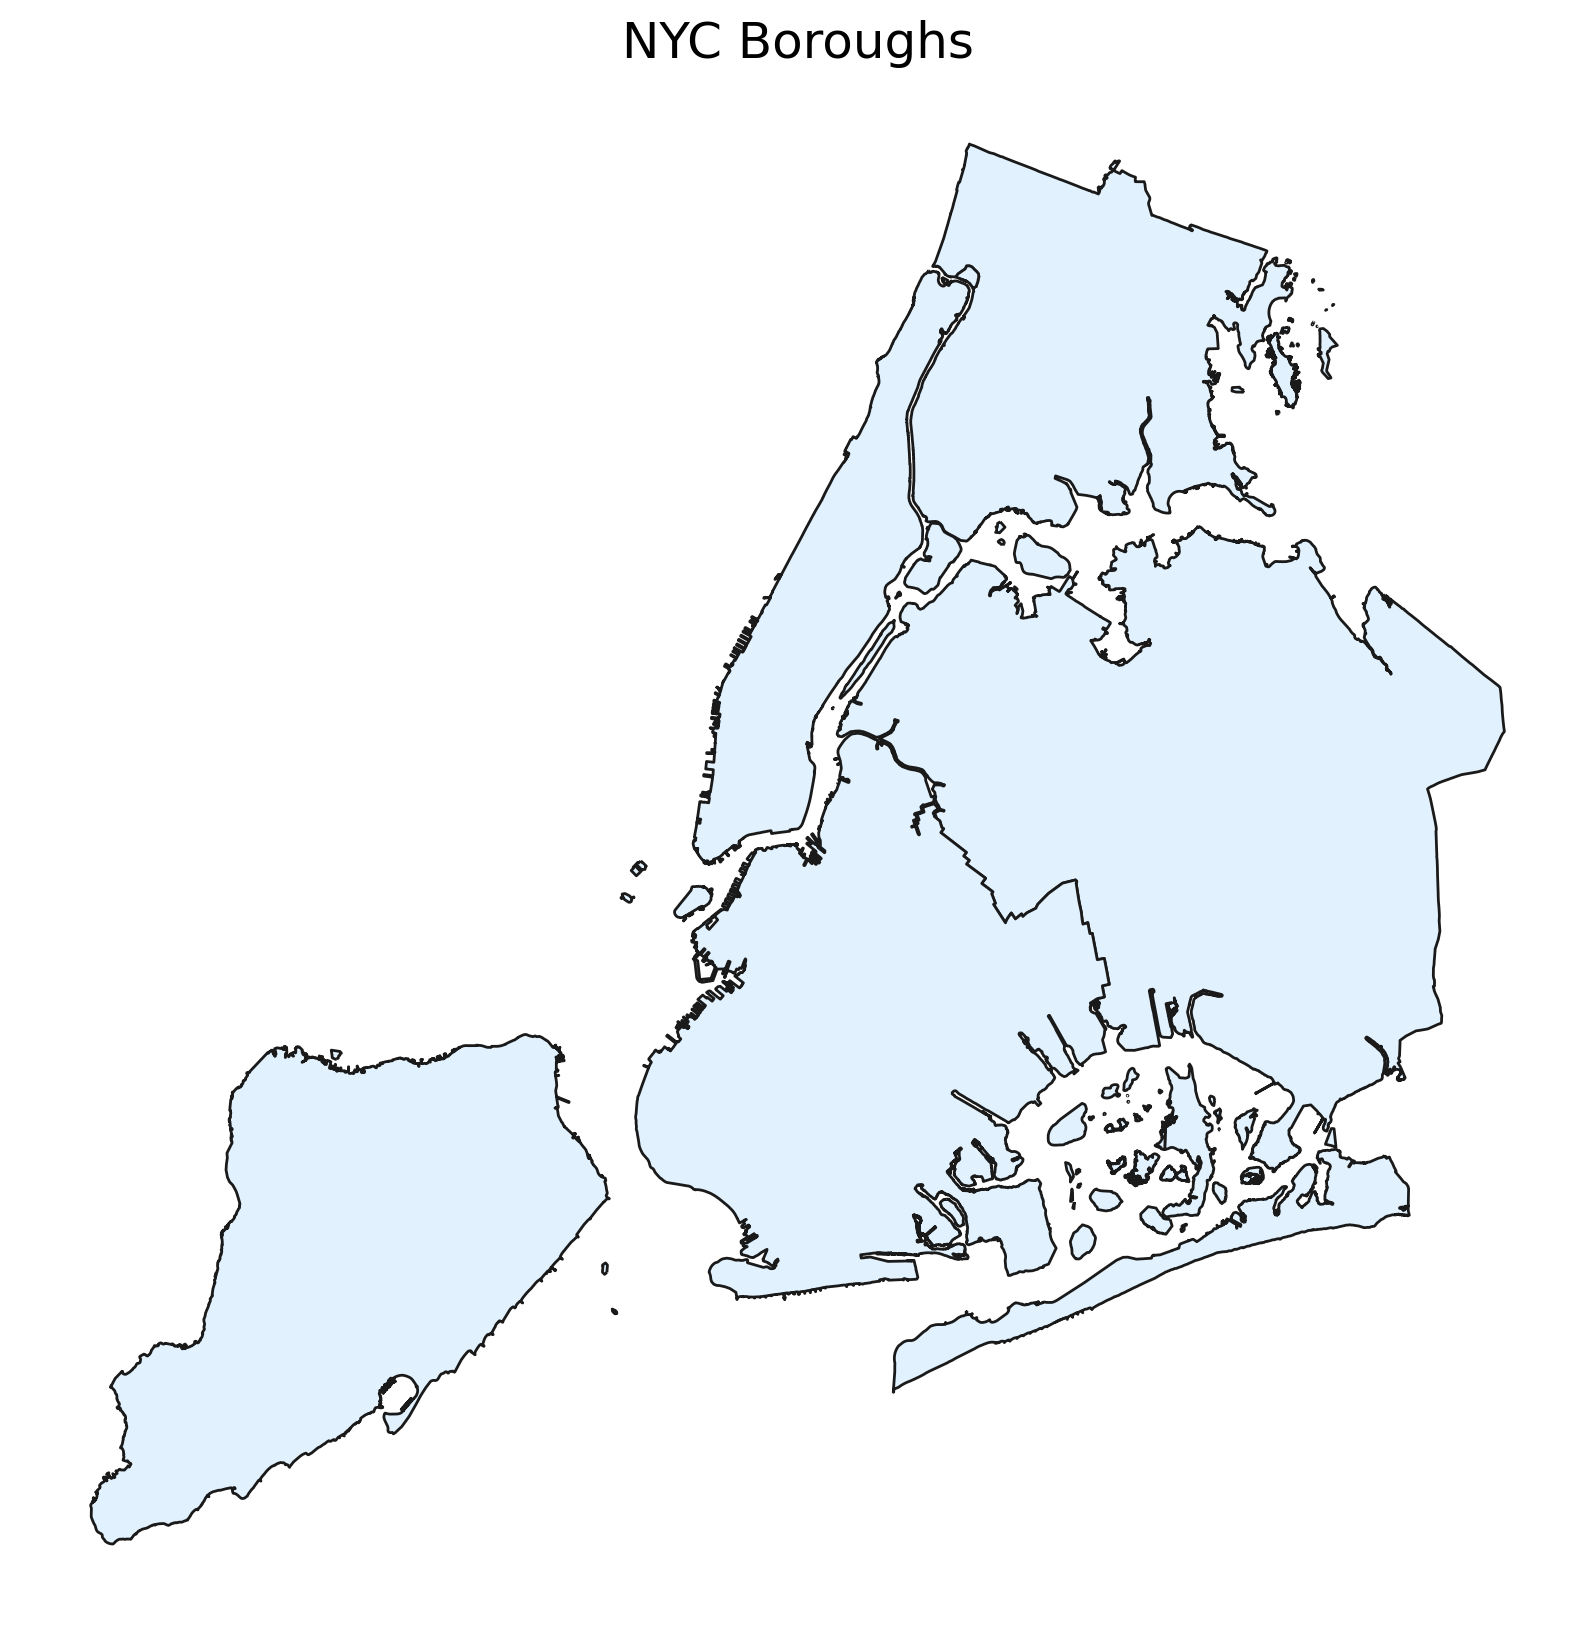

In [12]:
# Plot the map of the NYC Boroughs
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('NYC Boroughs', fontsize=18)
ax.axis('off')
boroughs.plot(ax=ax, edgecolor='0.1', linewidth=1, color='#e1f1fd')
plt.show()

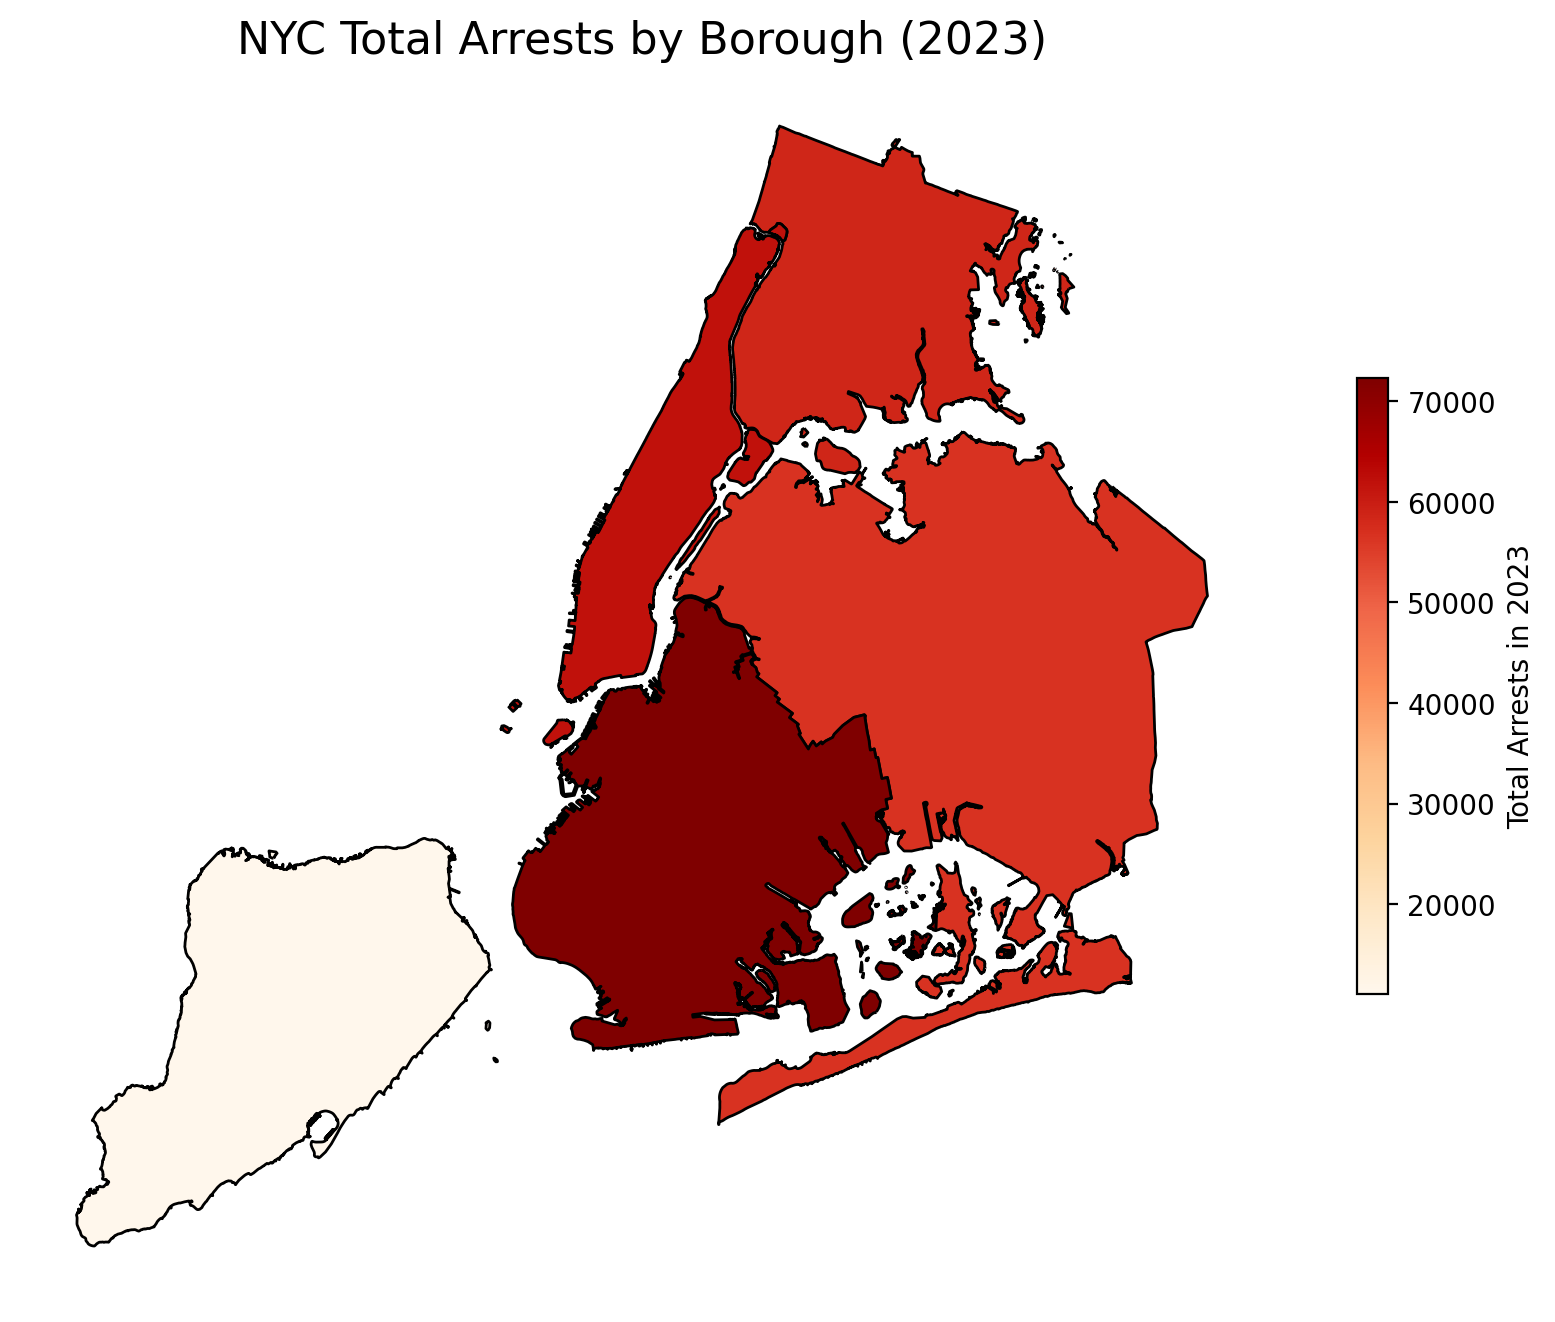

In [13]:
!pip install pyogrio

from pyogrio import read_dataframe

# 2) Build your arrest‐counts DataFrame
# Map the one-letter codes to the full borough names
boro_map = {'M': 'Manhattan', 'K': 'Brooklyn', 'B': 'Bronx', 'Q': 'Queens', 'S': 'Staten Island'}
df_2023['BoroName'] = df_2023['arrest_boro'].map(boro_map)

# Count total arrests per borough
counts = (
    df_2023['BoroName']
      .value_counts()
      .rename_axis('BoroName')
      .reset_index(name='arrest_count')
)

# 3) Merge the counts into the GeoDataFrame
# The shapefile has a column called "BoroName"
boroughs = boroughs.merge(counts, on='BoroName', how='left')
boroughs['arrest_count'] = boroughs['arrest_count'].fillna(0).astype(int)

# 4) Plot, shading by total arrests
fig, ax = plt.subplots(figsize=(12, 8))
boroughs.plot(
    column='arrest_count',
    cmap='OrRd',
    edgecolor='black',
    linewidth=1,
    legend=True,
    legend_kwds={'label': "Total Arrests in 2023", 'shrink': 0.5},
    ax=ax
)
ax.set_axis_off()
ax.set_title('NYC Total Arrests by Borough (2023)', fontsize=16)
plt.show()

# Manhattan

In [14]:
renamed_df_2023 = renamed_df_2023.sort_values(by=['arrest_boro'])

In [15]:
new_arrest_df = renamed_df_2023.rename(columns={
    'arrest_date': 'Arrest Date',
    'pd_desc': 'PD Description',
    'ofns_desc': 'Offence Description',
    'arrest_boro': 'Arrest Borough',
    'arrest_precinct': 'Arrest Precinct',
    'age_group': 'Age Group',
    'perp_sex': 'Perpetrator Sex',
    'perp_race': 'Perpetrator Race'
})

In [16]:
# Filter for Manhattan borough
manhattan_df = new_arrest_df[new_arrest_df['Arrest Borough'] == 'M']

In [17]:
# Create the dictionary
precinct_dict = dict(zip(manhattan_df['Arrest Precinct'].unique(), manhattan_df['Arrest Precinct'].unique()))

In [18]:
# Counts number of arrests per precinct in dictionary
precinct_arrest_counts = manhattan_df.groupby('Arrest Precinct')['Arrest Precinct'].count().to_dict()

In [19]:
# Converts dictionary to df
precinct_arrest_df = pd.DataFrame.from_dict(precinct_arrest_counts, orient='index', columns=['Arrest Count'])
precinct_arrest_df.index = precinct_arrest_df.index.astype(int)
sorted_precinct_arrest_df = precinct_arrest_df.sort_index()
sorted_precinct_arrest_df.index.name = 'Precinct'  # Set index name for clarity

# display(sorted_precinct_arrest_df)  # Display the DataFrame as a table
# print(len(precinct_arrest_df))

# Sorts df by descending arrest number
sorted_by_arrests_df = sorted_precinct_arrest_df.sort_values(by=['Arrest Count'], ascending=False)

# Adds row at bottom with the total number of arrests
total_arrests = sorted_by_arrests_df['Arrest Count'].sum()
total_row = pd.DataFrame({'Arrest Count': [total_arrests]}, index=['Total'])
sorted_by_arrests_df = pd.concat([sorted_by_arrests_df, total_row])
# display(sorted_by_arrests_df)

In [20]:
# Calculate proportion and add as a new column
sorted_by_arrests_df['Proportion'] = sorted_by_arrests_df['Arrest Count'] / total_arrests

# Define a function to categorise precincts
def categorise_precinct(precinct):
    # List of precincts in Manhattan South
    south_precincts = [1, 5, 6, 7, 9, 10, 13, 14, 17, 18]
    # List of precincts in Manhattan North
    north_precincts = [19, 20, 22, 23, 24, 25, 26, 28, 30, 32, 33, 34]

    if precinct in south_precincts:
        return 'Manhattan South'
    elif precinct in north_precincts:
        return 'Manhattan North'
    else:
        return 'Other'  # Handle precincts not in either category

sorted_by_arrests_df['Patrol Borough'] = sorted_by_arrests_df.index.map(categorise_precinct)  # Assuming 'Precinct' is the index

# Display the updated DataFrame
# display(sorted_by_arrests_df)

In [21]:
# Calculate average arrests for each category
average_arrests_by_category = sorted_by_arrests_df.groupby('Patrol Borough')['Arrest Count'].mean().to_dict()

# Get the total average arrests
total_average_arrests = sorted_by_arrests_df['Arrest Count'].mean()

# Create the list with average arrests
average_arrests_list = [
    average_arrests_by_category.get('Manhattan North', 0),  # Average for North precincts
    average_arrests_by_category.get('Manhattan South', 0),  # Average for South precincts
    average_arrests_by_category.get('Other', 0),  # Average for Other precincts
    total_average_arrests  # Total average
]

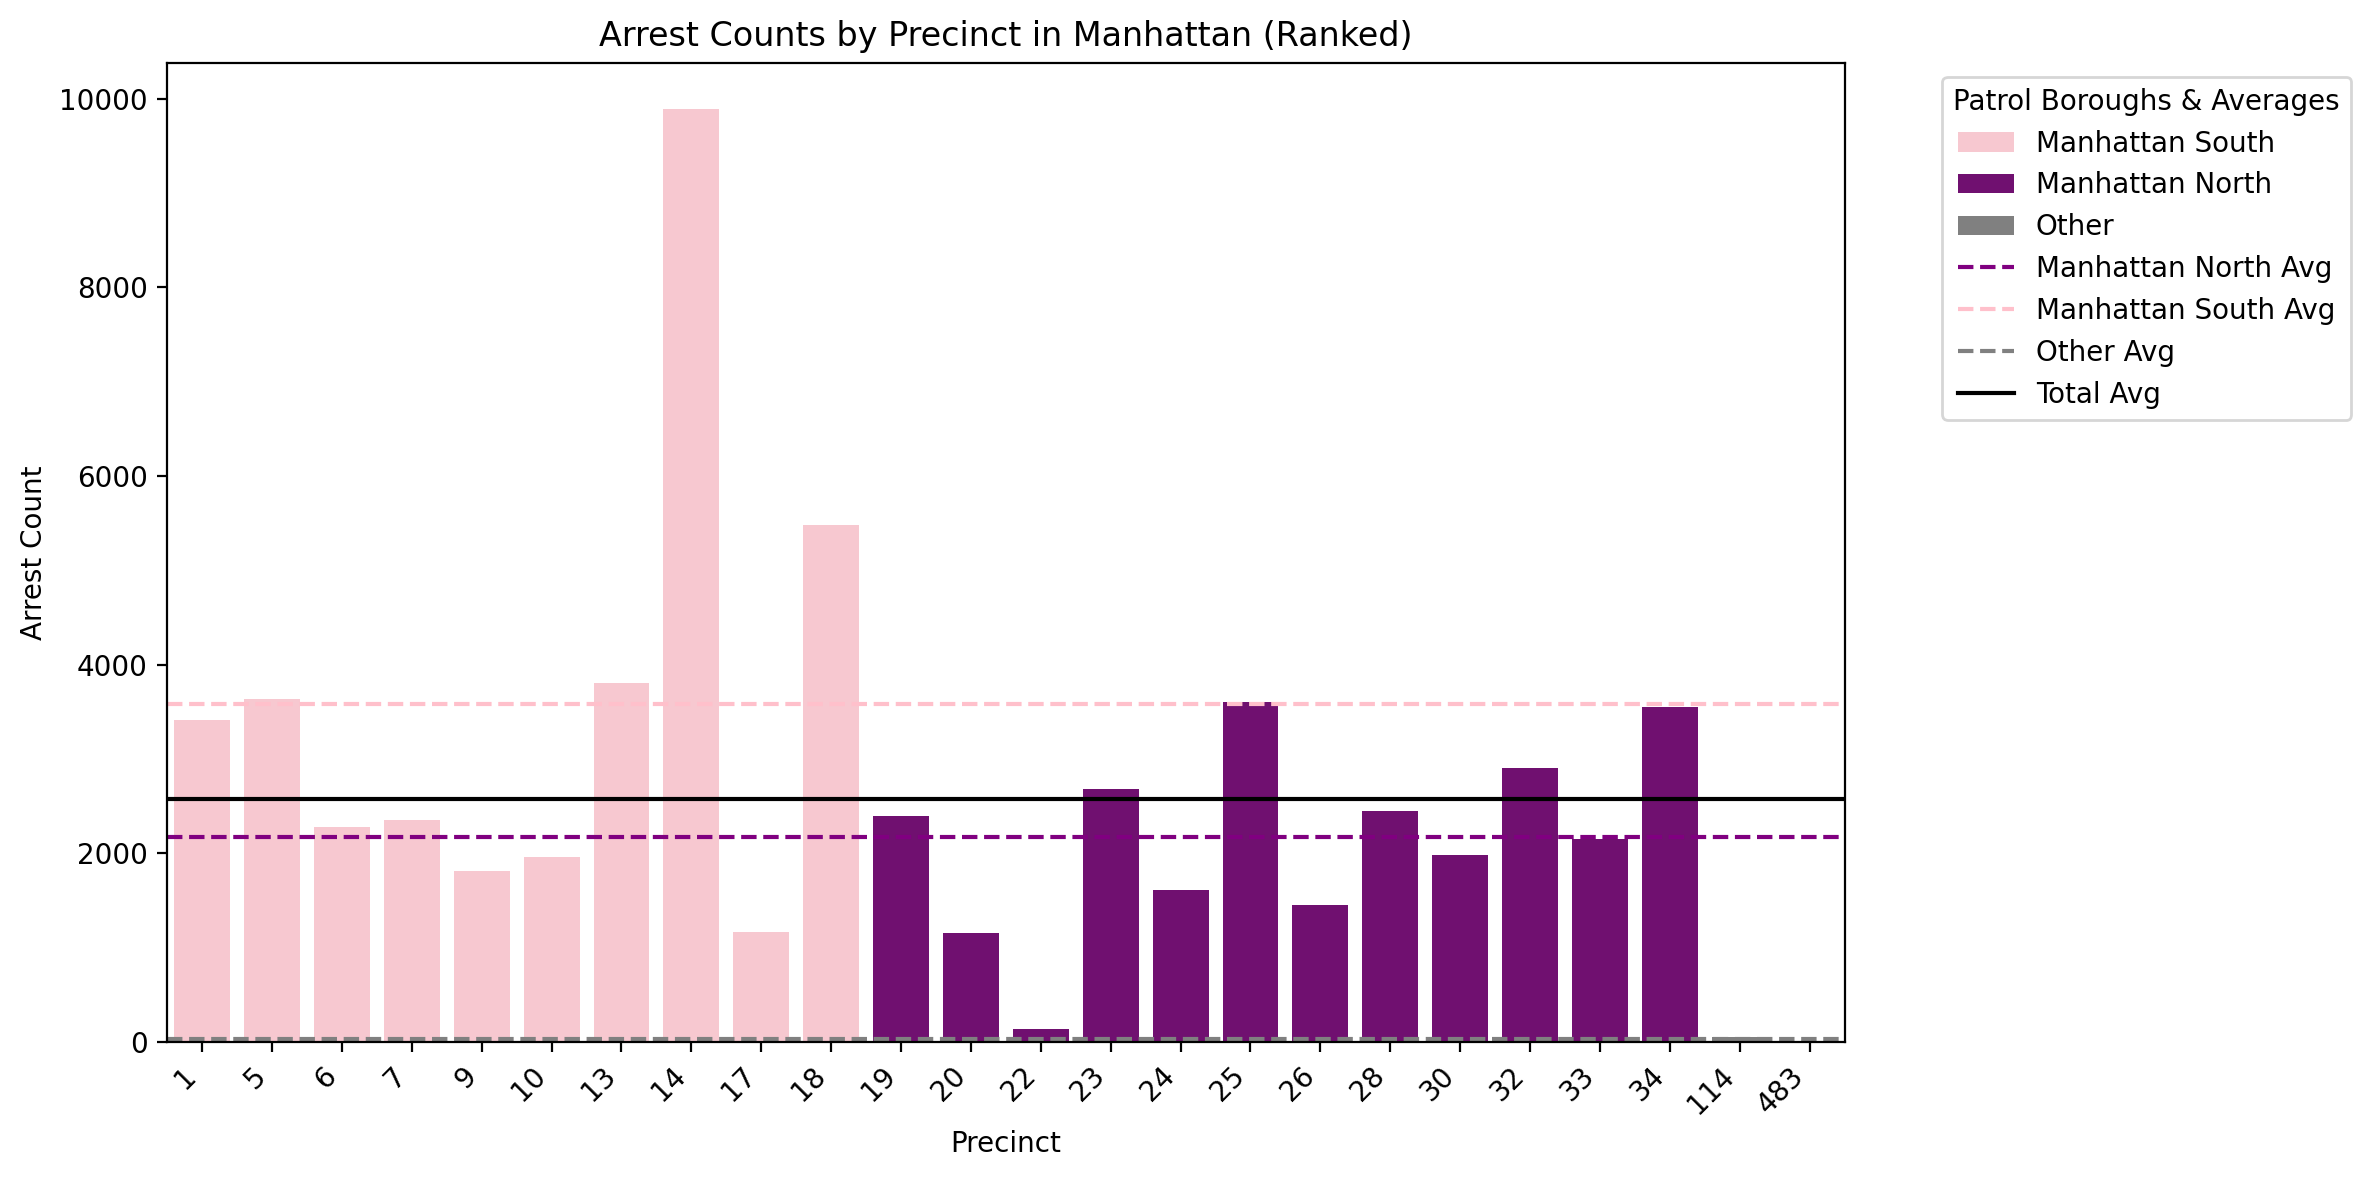

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for enhanced styling

# Sort by Arrest Count in descending order
sorted_df = sorted_by_arrests_df.loc[sorted_by_arrests_df.index != 'Total'].sort_values(by=['Arrest Count'], ascending=False)

# Your predefined lists (replace with your actual precinct lists)
south_precincts = [1, 5, 6, 7, 9, 10, 13, 14, 17, 18]
north_precincts = [19, 20, 22, 23, 24, 25, 26, 28, 30, 32, 33, 34]

def categorize_precinct_by_list(precinct):
    # List of precincts in Manhattan South
    if precinct in south_precincts:
        return 'Manhattan South'

    # List of precincts in Manhattan North
    elif precinct in north_precincts:
        return 'Manhattan North'
    else:
        return 'Other'  # Handle precincts not in either category

# Apply the function to create a new color column
sorted_df['Color Category'] = sorted_df.index.map(categorize_precinct_by_list)

# Create a color mapping for patrol boroughs
patrol_borough_colors = {
    'Manhattan South': 'pink',
    'Manhattan North': 'purple',
    'Other': 'gray'
}

# Create the bar chart with color mapping
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=sorted_df.index,
    y=sorted_df['Arrest Count'],
    hue=sorted_df['Patrol Borough'],  # Use Color Category as hue for color grouping
    palette=patrol_borough_colors,  # palette is set to the patrol_borough_colors
    dodge=False  # This will make sure that the bar charts remain centered on the x-axis
)

average_arrests_by_category = sorted_df.groupby('Patrol Borough')['Arrest Count'].mean().to_dict()

# Get the total average arrests
total_average_arrests = sorted_df['Arrest Count'].mean()

north_avg = average_arrests_by_category.get('Manhattan North', 0)
south_avg = average_arrests_by_category.get('Manhattan South', 0)
other_avg = average_arrests_by_category.get('Other', 0)
total_avg = total_average_arrests

# north_avg, south_avg, other_avg, total_avg = average_arrests_list
plt.axhline(y=north_avg, color='purple', linestyle='--', label='Manhattan North Avg')
plt.axhline(y=south_avg, color='pink', linestyle='--', label='Manhattan South Avg')
plt.axhline(y=other_avg, color='gray', linestyle='--', label='Other Avg')
plt.axhline(y=total_avg, color='black', linestyle='-', label='Total Avg')

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Create a new legend with custom label
ax.legend(handles=handles, labels=labels, title="Patrol Boroughs & Averages", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title('Arrest Counts by Precinct in Manhattan (Ranked)')
plt.xlabel('Precinct')
plt.ylabel('Arrest Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('arrest_counts_by_precinct.png')
plt.show()

A small group of precincts accounts for a disproportionately large share of arrests, suggesting concentrated enforcement or higher incident rates in those areas. The pink (Manhattan South) and purple (Manhattan North) bars show clear differences in arrest volumes between the two boroughs, which may reflect variations in population density, land use, or policing strategies. Precincts whose counts fall below both their borough and the citywide averages could correspond to areas with lower overall crime or to successful community programs. Mapping these variances provides a data-driven basis for allocating patrol resources, social services, or prevention initiatives where they are most needed.

Notably, Precinct 14, covering Times Square, records the highest number of arrests (9887), which aligns with the heavy pedestrian traffic, tourist activity, and late-night entertainment venues in that district. Mapping these variances provides a data-driven basis for allocating patrol resources, social services, or prevention initiatives where they are most needed.

# Queens

Question:
How do arrest patterns in Queens reflect potential racial and age-based disparities in policing? What does this reveal about systemic inequities in the criminal justice system? I am specifically looking at White, Black, and White Hispanic because historically black and hispanic communities have been dispprortionately targeted by policing in the united states. The White population serves as comparison factor or baseline against which the experiences of Black and White Hispanic populations can be measured.

In [23]:
renamed_df_2023 = renamed_df_2023.sort_values(by=['arrest_boro'])
new_arrest_df = renamed_df_2023.rename(columns={
    'arrest_date': 'Arrest Date',
    'pd_desc': 'PD Description',
    'ofns_desc': 'Offence Description',
    'arrest_boro': 'Arrest Borough',
    'arrest_precinct': 'Arrest Precinct',
    'age_group': 'Age Group',
    'perp_sex': 'Perpetrator Sex',
    'perp_race': 'Perpetrator Race'
})
# filter for queens
queens_df = new_arrest_df[new_arrest_df['Arrest Borough'] == 'Q']
queens_df.head(5)

,Arrest Date,PD Description,Offence Description,Arrest Borough,Arrest Precinct,Age Group,Perpetrator Sex,Perpetrator Race
117702,2024-06-15T00:00:00.000,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,Q,114,25-44,F,BLACK
117695,2024-06-15T00:00:00.000,"TRAFFIC,UNCLASSIFIED MISDEMEAN",VEHICLE AND TRAFFIC LAWS,Q,115,25-44,M,WHITE HISPANIC
92514,2024-05-12T00:00:00.000,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Q,107,25-44,F,ASIAN / PACIFIC ISLANDER
117691,2024-06-15T00:00:00.000,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Q,113,25-44,M,ASIAN / PACIFIC ISLANDER
92605,2024-05-12T00:00:00.000,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Q,115,<18,M,WHITE


Contingency Table:
 Perpetrator Race  BLACK  WHITE  WHITE HISPANIC
Age Group                                     
18-24              3304    429            3993
25-44             11210   2941           12630
45-64              4051   1515            2454
65+                 388    276             203
<18                 940     79             769

Most Frequent Combination: ('25-44', 'WHITE HISPANIC')
Frequency: 12630


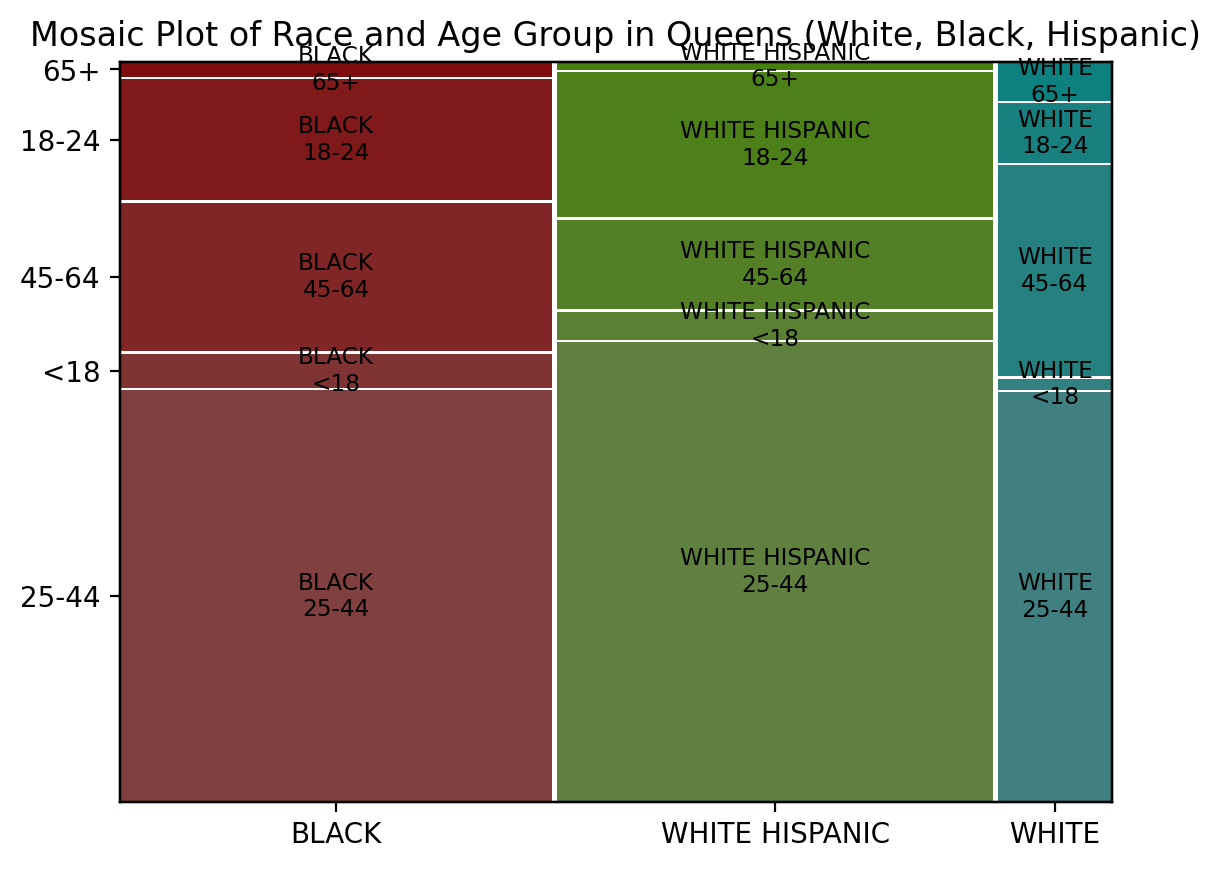

In [24]:
#new lib for fun graph
from statsmodels.graphics.mosaicplot import mosaic

# filter
filtered_queens_df = queens_df[queens_df['Perpetrator Race'].isin(['WHITE', 'BLACK', 'WHITE HISPANIC'])]

#contingency table with age and race
contingency_table = pd.crosstab(filtered_queens_df['Age Group'], filtered_queens_df['Perpetrator Race'])

#print table (check data)
print("Contingency Table:\n", contingency_table)

# find max w highest frequency in the table
max_frequency = contingency_table.max().max()
most_frequent_combination = contingency_table[contingency_table == max_frequency].stack().idxmax()
print("\nMost Frequent Combination:", most_frequent_combination)
print("Frequency:", max_frequency)

# filter for white, Black, and hispani
mosaic(filtered_queens_df, ['Perpetrator Race', 'Age Group'],
       title='Mosaic Plot of Race and Age Group in Queens (White, Black, Hispanic)')
plt.show()

This mosaic plot shows the evident racial disparities in Queens arrest patterns, with Black and White communities facing dissproportionately higher arrest rates. Compared to White populations across almost all age brackets. The 25-44 age group shows the highest concentration of arrests for all racial categories. These arrest patterns
Also mirror the consequences of systemic disinvestment in Black and Hispanic neighborhoods, where povery rate exeed over 20% compared to wealthy white neighborhoods.Moreover, this reflects how policing can criminalize poverty through heightened surveillance of low-income communities of color.


<Figure size 1500x800 with 0 Axes>

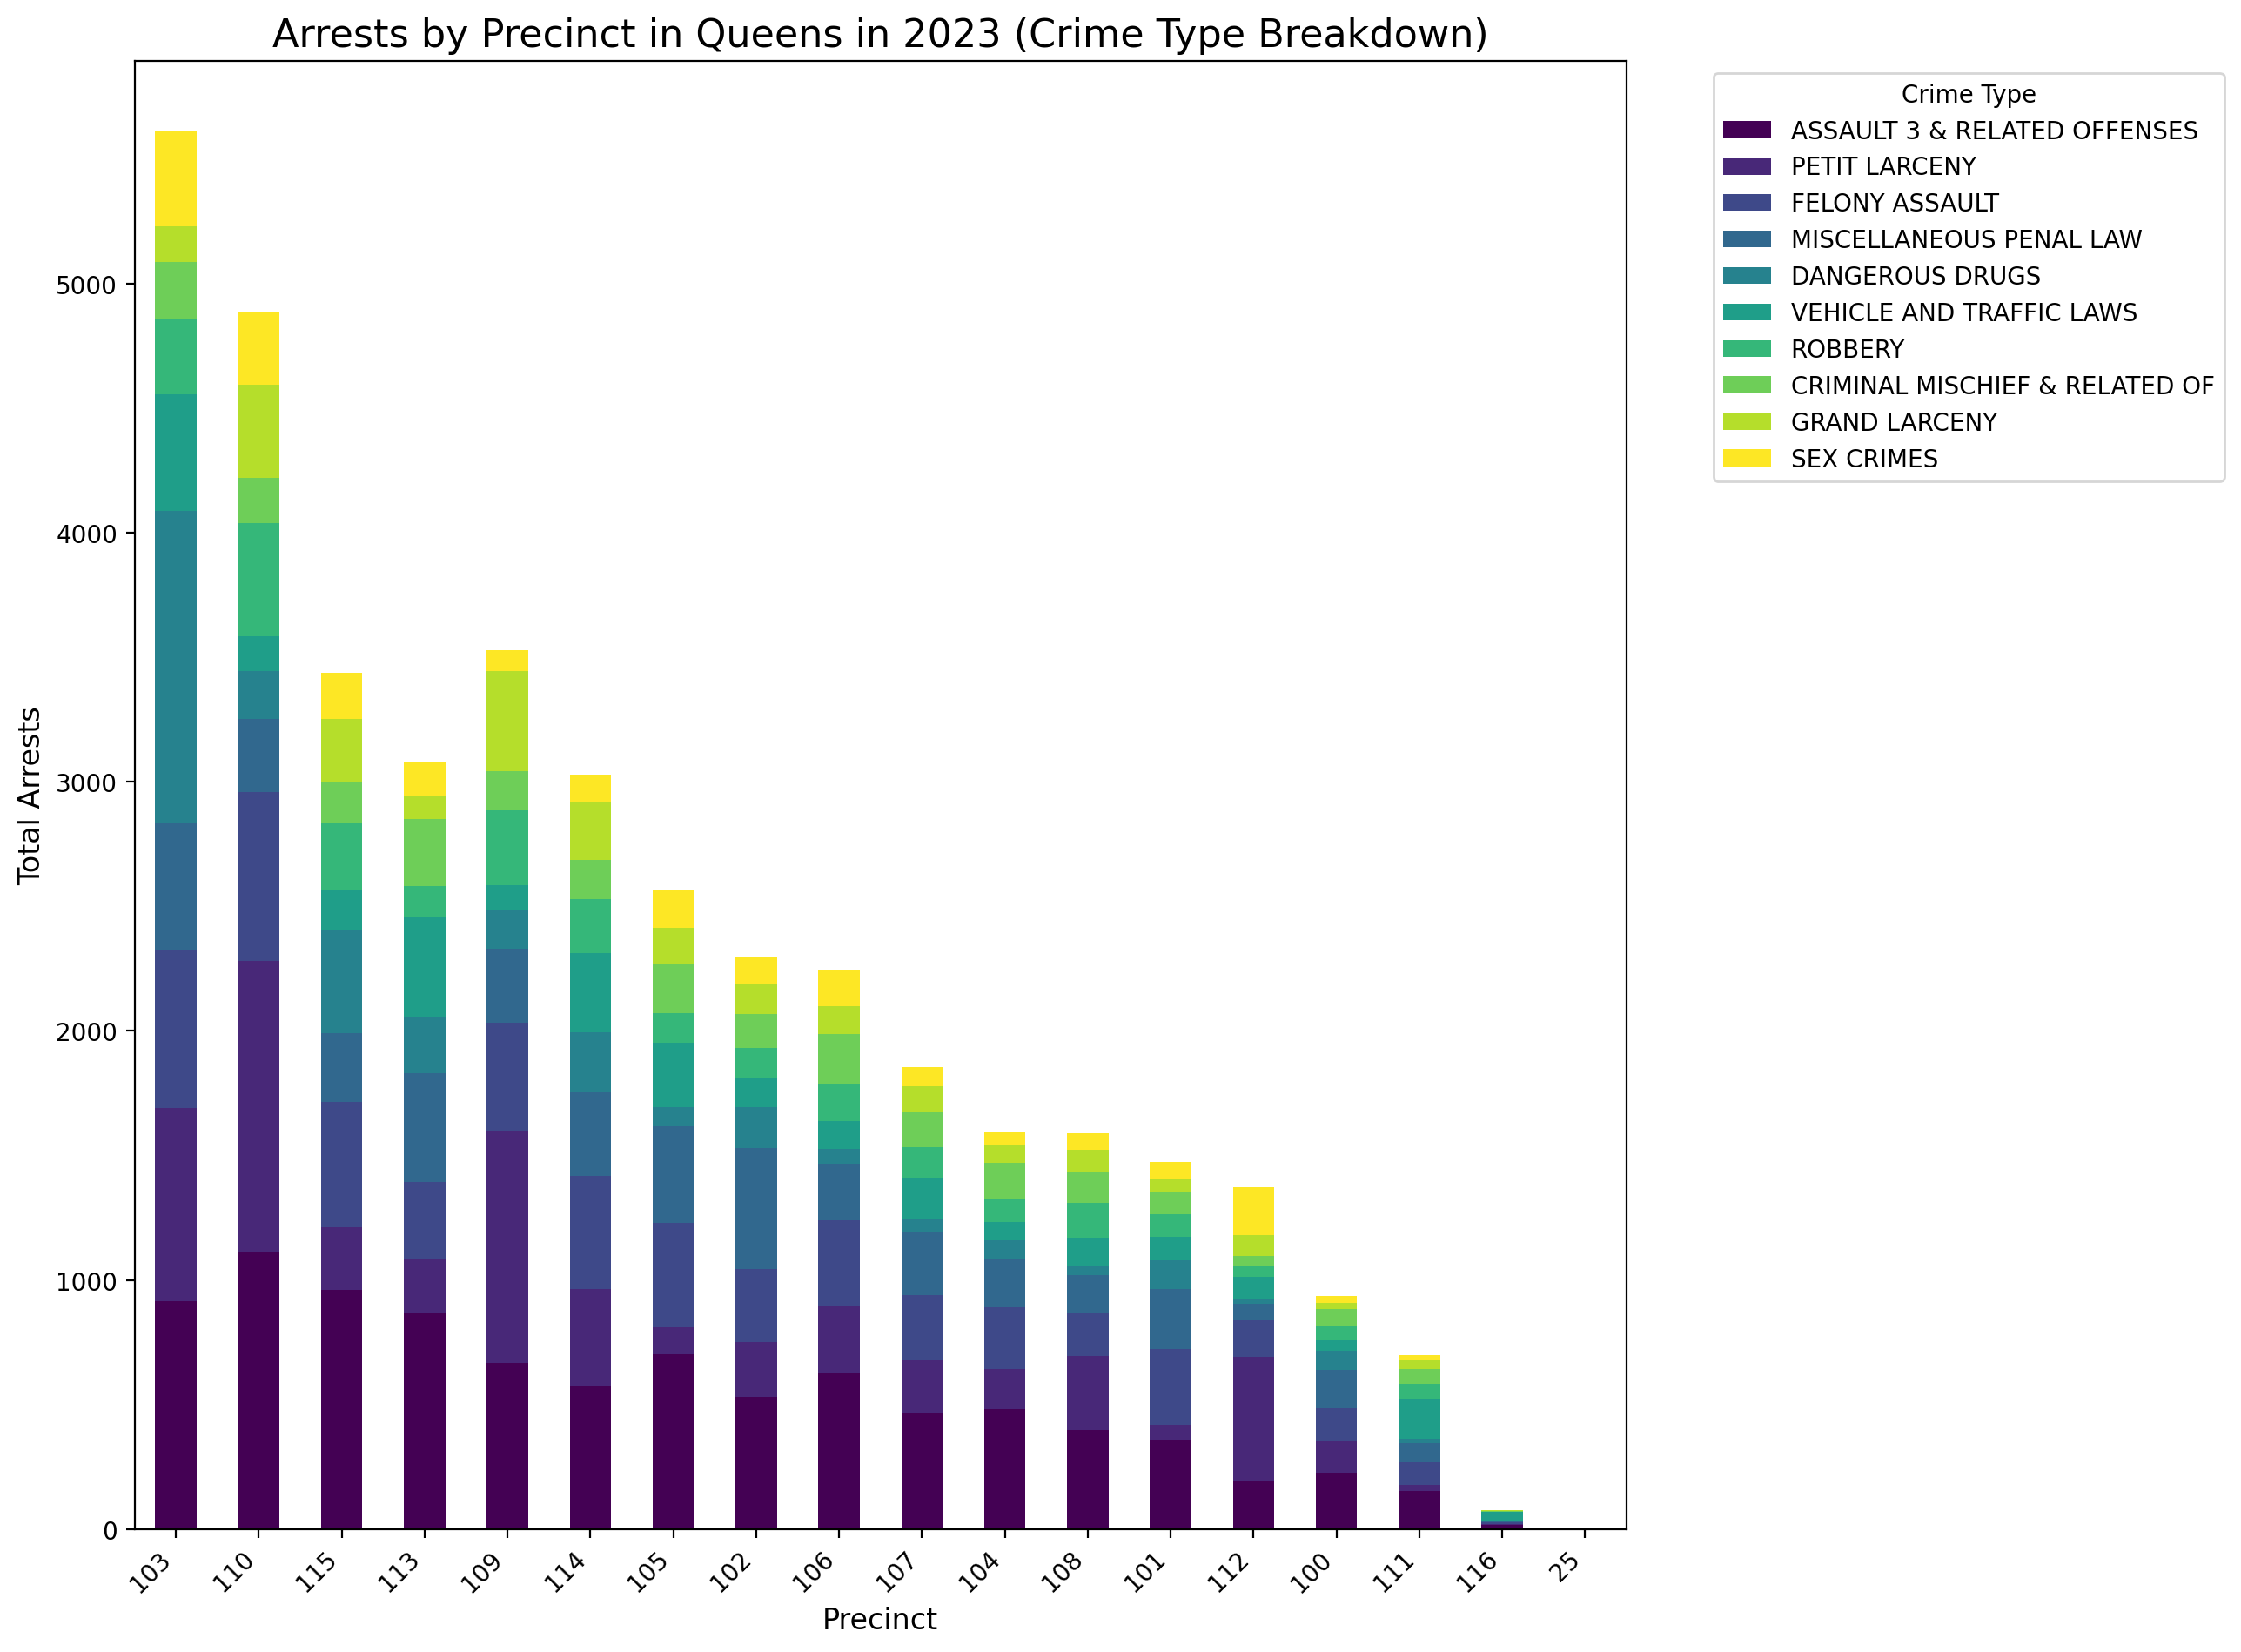

In [25]:
# sort by precinct + type of arrest
precinct_crime_counts = queens_df.groupby(['Arrest Precinct', 'Offence Description']).size().unstack(fill_value=0)
precinct_crime_counts = precinct_crime_counts.loc[precinct_crime_counts.sum(axis=1).sort_values(ascending=False).index]

# for data visualization to show top 10 crimes (stacked visualization)
top_n_crimes = precinct_crime_counts.sum().nlargest(10).index
precinct_crime_counts = precinct_crime_counts[top_n_crimes]

# fun plot stack bar
plt.figure(figsize=(15, 8))
ax = precinct_crime_counts.plot(kind='bar', stacked=True, colormap='viridis') # 'viridis' or other suitable colormaps

#plot titles + logistics
plt.title('Arrests by Precinct in Queens in 2023 (Crime Type Breakdown)', fontsize=16)
plt.xlabel('Precinct', fontsize=12)
plt.ylabel('Total Arrests', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) #Improved Legend Placement and Font Size
plt.tight_layout(rect=[0, 0, 2, 2])  # Adjust layout to prevent legend cutoff


plt.show()

# Staten Island

In [26]:
renamed_df_2023 = renamed_df_2023.sort_values(by=['arrest_boro'])
new_arrest_df = renamed_df_2023.rename(columns={
    'arrest_date': 'Arrest Date',
    'pd_desc': 'PD Description',
    'ofns_desc': 'Offence Description',
    'arrest_boro': 'Arrest Borough',
    'arrest_precinct': 'Arrest Precinct',
    'age_group': 'Age Group',
    'perp_sex': 'Perpetrator Sex',
    'perp_race': 'Perpetrator Race'
})
# Filter for Queens borough
staten_df = new_arrest_df[new_arrest_df['Arrest Borough'] == 'S']
# staten_df.head(5)

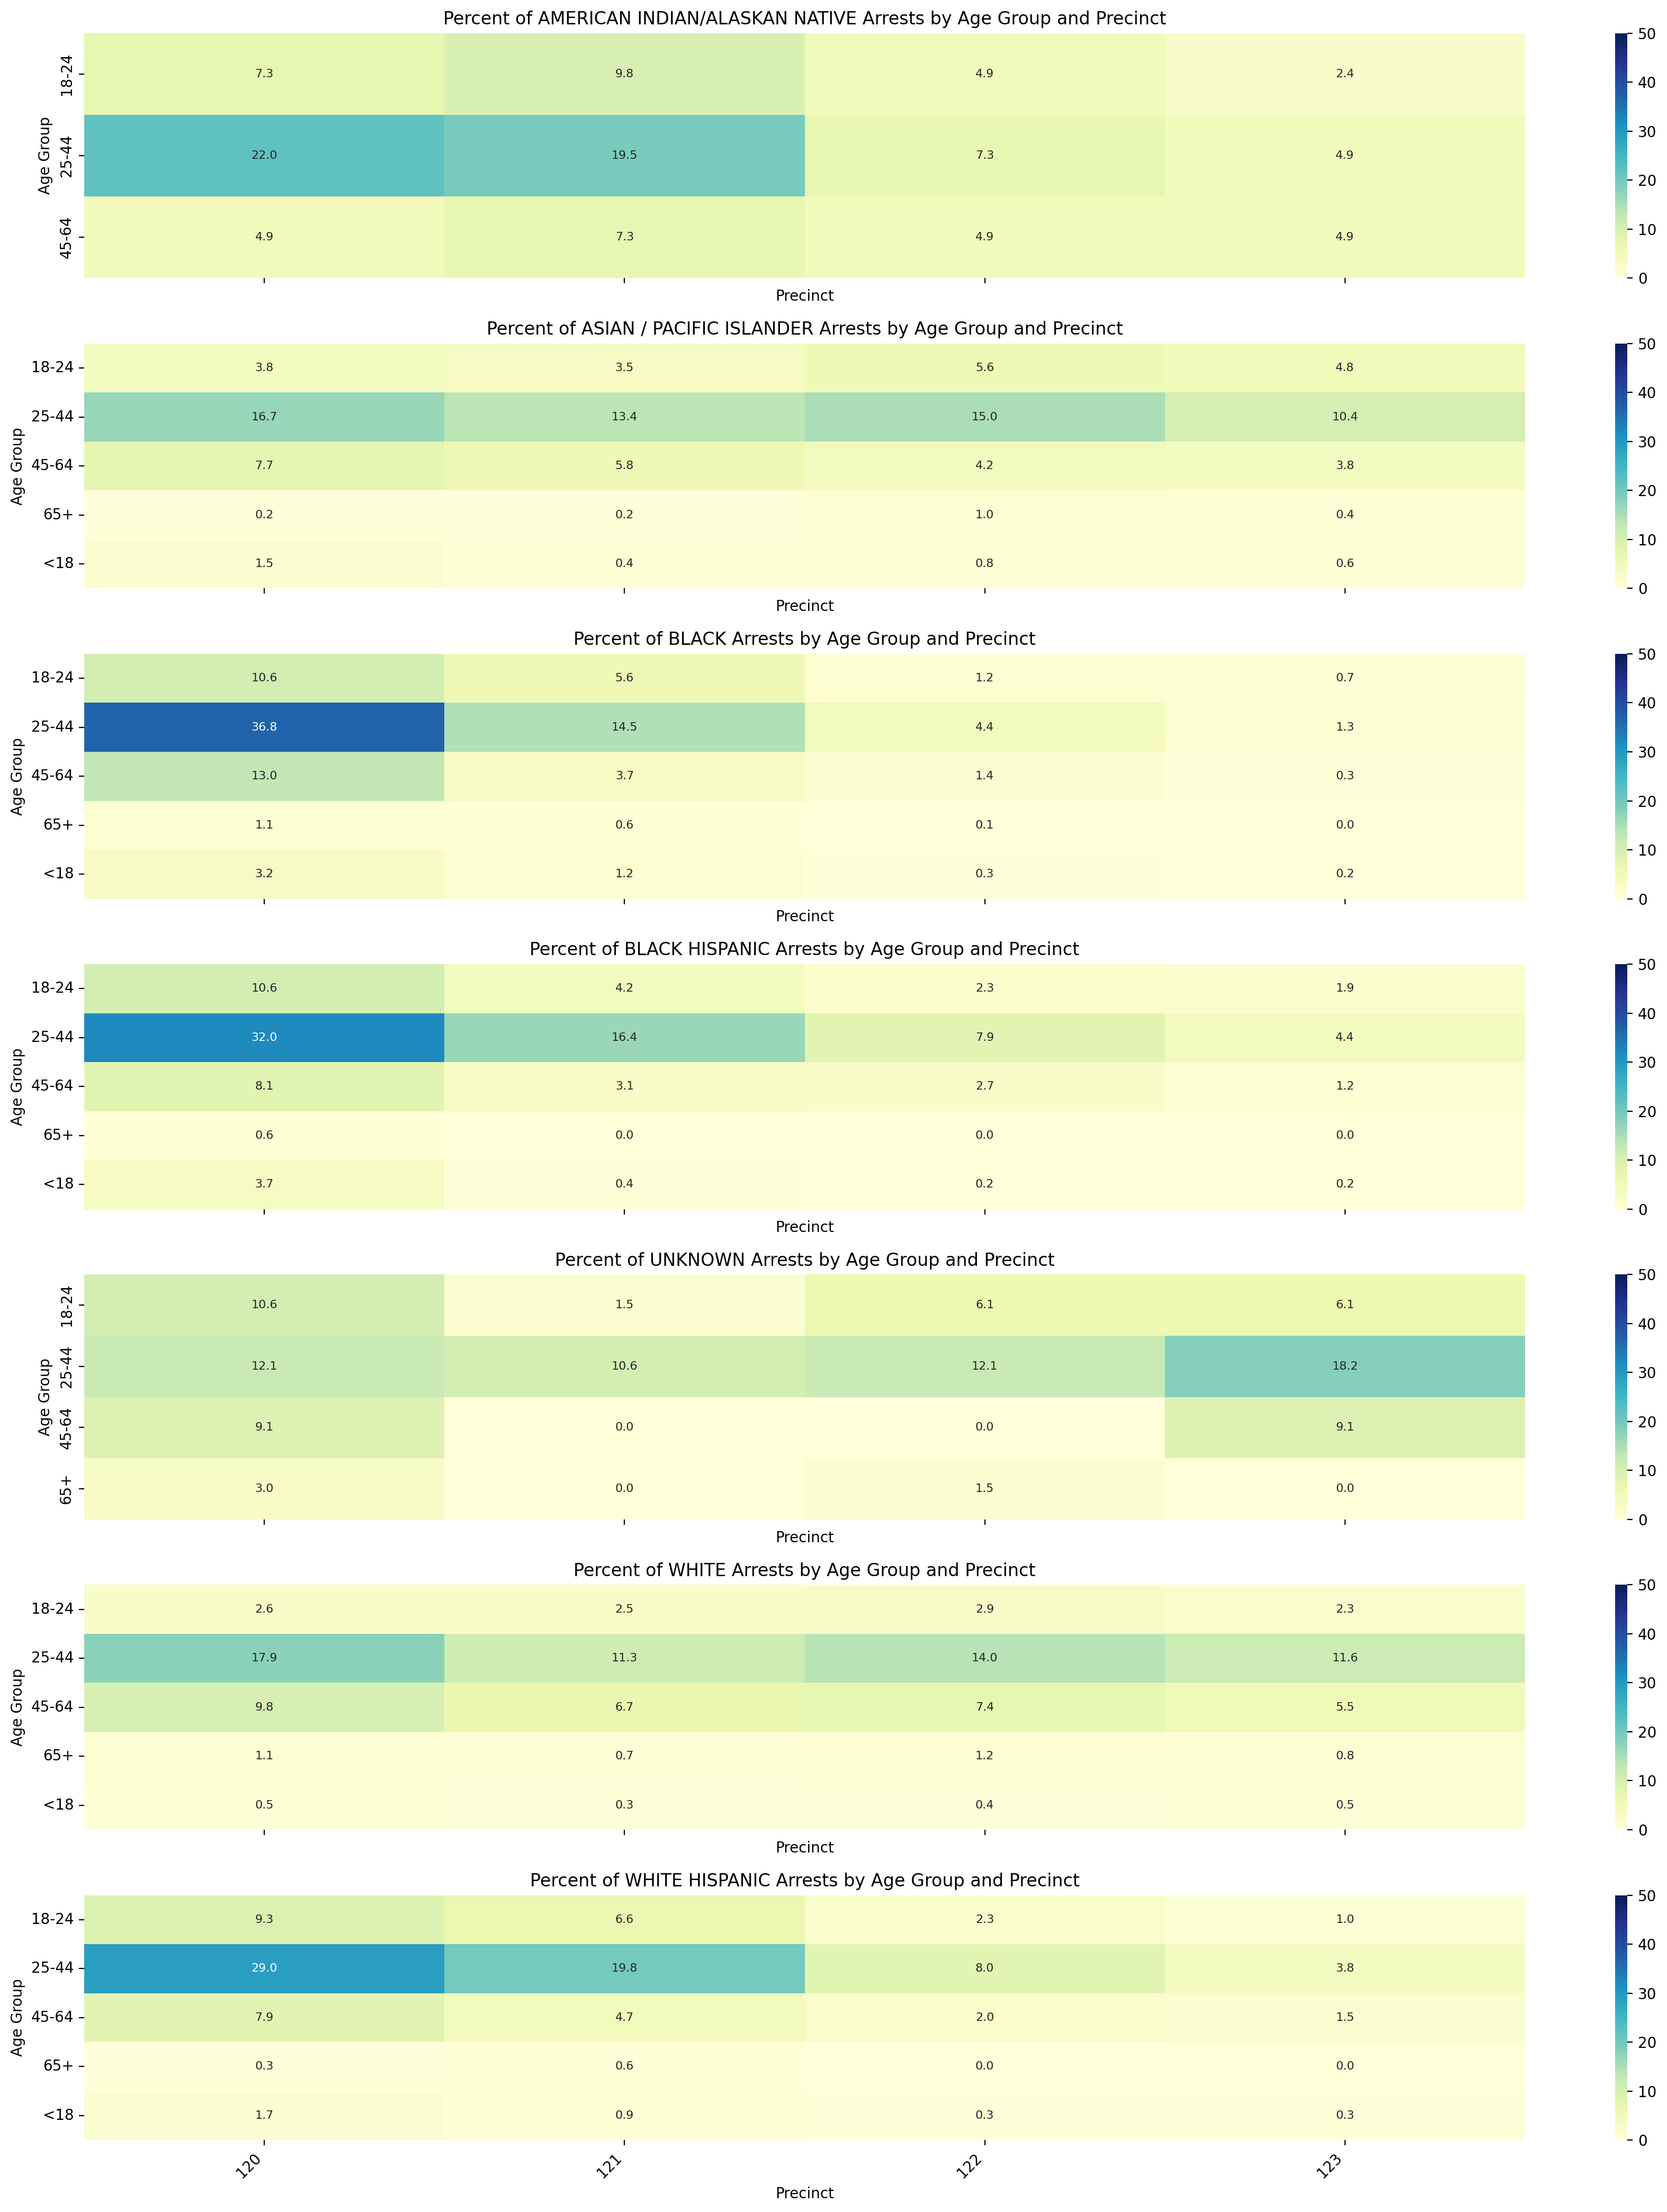

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming renamed_df_2023 is already defined
new_arrest_df = renamed_df_2023.rename(columns={
    'arrest_date': 'Arrest Date',
    'pd_desc': 'PD Description',
    'ofns_desc': 'Offence Description',
    'arrest_boro': 'Arrest Borough',
    'arrest_precinct': 'Arrest Precinct',
    'age_group': 'Age Group',
    'perp_sex': 'Perpetrator Sex',
    'perp_race': 'Perpetrator Race'
})

# Filter for Staten Island
staten_df = new_arrest_df[new_arrest_df['Arrest Borough'] == 'S']

# Group by race, precinct, and age group
precinct_age_race = staten_df.groupby(['Perpetrator Race', 'Arrest Precinct', 'Age Group']).size().reset_index(name='Arrest Count')

# Calculate percent of total arrests per race
total_by_race = precinct_age_race.groupby('Perpetrator Race')['Arrest Count'].sum().reset_index(name='Total Arrests')
merged = pd.merge(precinct_age_race, total_by_race, on='Perpetrator Race')
merged['Percent'] = (merged['Arrest Count'] / merged['Total Arrests']) * 100

# Create heatmaps per race
heatmap_data = {}
for race in merged['Perpetrator Race'].unique():
    df_race = merged[merged['Perpetrator Race'] == race]
    pivot = df_race.pivot(index='Age Group', columns='Arrest Precinct', values='Percent').fillna(0)
    heatmap_data[race] = pivot

# Plot
num_races = len(heatmap_data)
fig, axes = plt.subplots(nrows=num_races, figsize=(18, 3 * num_races), sharex=True)

if num_races == 1:
    axes = [axes]

for ax, (race, data) in zip(axes, heatmap_data.items()):
    sns.heatmap(data, ax=ax, cmap='YlGnBu', cbar=True, vmin=0, vmax=50, annot=True, fmt=".1f", annot_kws={"size": 8})
    ax.set_title(f'Percent of {race} Arrests by Age Group and Precinct')
    ax.set_ylabel('Age Group')
    ax.set_xlabel('Precinct')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


Remarks: Staten Island is an uniquely position burrough for this type of data analysis. There are only four precincts in the burrough which makes for some obvious patterns in arrest demographics. Rather than just a simplistic breakdown of arrests by precincts and by age, breaking it down race by race seemed like it could yield some informative results. What jumps out first is the 120th Precinct and the lopsided amount of arrests there, especially with the 25-44 age group. This was true for Black, Indigenous/Alaskan, Hispanic arrests and although 25-44 is a intuitively common age group for crime, the 120th Precinct was a hotbed for it compared to both the other three Precincts and the other age groups within the 120th. Additionally, police have historically targeted young Black and Hispanic men like this so this wouldn't be too surpising. This relates back to our research question as this suggest a gap in socioeconomic status is present between Precincts and perhaps disproportionate policing. This racial bias is potentially supported because White and Asian arrests are far more consistent across Precincts. There are, of course, many extrapolations and hypotheses being flung around here that require supplementary data to verify but these theories are based on trends, this data product, and outside information from research.

#Immigration and Crime Rates

[16] Davies, G., & Fagan, J. (2012). Crime and enforcement in immigrant neighborhoods: Evidence from New York City. The Annals of the American Academy of Political and Social Science, 641(1), 99-124.

In their analysis of immigrant neighborhoods in NYC, the authors found that areas with greater wealth indicators, such as higher housing prices, tend to experience lower levels of police enforcement relative to crime rates. Their generalized propensity score model reveals that immigrant groups that settle in more wealth neighborhoods face different policing patterns than those in economically disadvantaged neighborhoods, suggesting that neighborhood socioeconomic status may influence enforcement practices independently of crime rates.


In [28]:
from census import Census
import pandas as pd

# 1) Initialize census API
c = Census("", year=2023)  # Replace with your key

# 2) Get relevant variables
vars = ["B05002_001E", "B05002_013E", "B05002_021E"]
raw_nativity = c.acs5.state_county(vars, '36', Census.ALL)  # '36' = NY state

# 3) Convert to DataFrame and calculate % foreign born
nativity_df = pd.DataFrame(raw_nativity)
nativity_df['GEOID'] = nativity_df['state'] + nativity_df['county']

# Convert to numeric and calculate share
nativity_df = nativity_df.astype({v: 'float' for v in vars})
nativity_df['pct_foreign_born'] = (nativity_df["B05002_021E"] / nativity_df["B05002_001E"])*100

# 4) Merge with your `merged_df`
merged = merged_df.merge(
    nativity_df[['GEOID', 'pct_foreign_born']],
    on='GEOID',
    how='left'
)

# 5) Sanity check
print(merged[['GEOID', 'arrest_boro', 'pct_foreign_born']].drop_duplicates().head())


   GEOID arrest_boro  pct_foreign_born
0  36005           B         15.852035
1  36081           Q         19.280304
2  36061           M         12.931659
4  36047           K         13.355372
5  36085           S          7.911165


In [29]:
from census import Census
import pandas as pd
import matplotlib.pyplot as plt

# 1) Initialize Census API
c = Census("", year=2023)  # Replace with your API key

# 2) Get foreign-born data by county in NY (state FIPS = 36)
vars = ["B05002_001E", "B05002_021E"]  # Total pop, Foreign-born
raw = c.acs5.state_county(vars, '36', Census.ALL)

# 3) Convert to DataFrame and compute percent foreign-born
df = pd.DataFrame(raw)
df['GEOID'] = df['state'] + df['county']
df = df.astype({v: 'float' for v in vars})
df['pct_foreign_born'] = df["B05002_021E"] / df["B05002_001E"]
df = df.rename(columns={"B05002_001E": "total_population"})

# 4) Count total arrests per borough
arrest_counts = merged_df.groupby('arrest_boro').size().reset_index(name='total_arrests')

# 5) Merge all data
borough_df = merged_df[['GEOID', 'arrest_boro']].drop_duplicates()
borough_df = borough_df.merge(arrest_counts, on='arrest_boro', how='left')
borough_df = borough_df.merge(df[['GEOID', 'total_population', 'pct_foreign_born']], on='GEOID', how='left')

# 6) Compute arrests per 1,000 residents
borough_df['arrests_per_1000'] = borough_df['total_arrests'] / borough_df['total_population'] * 1000



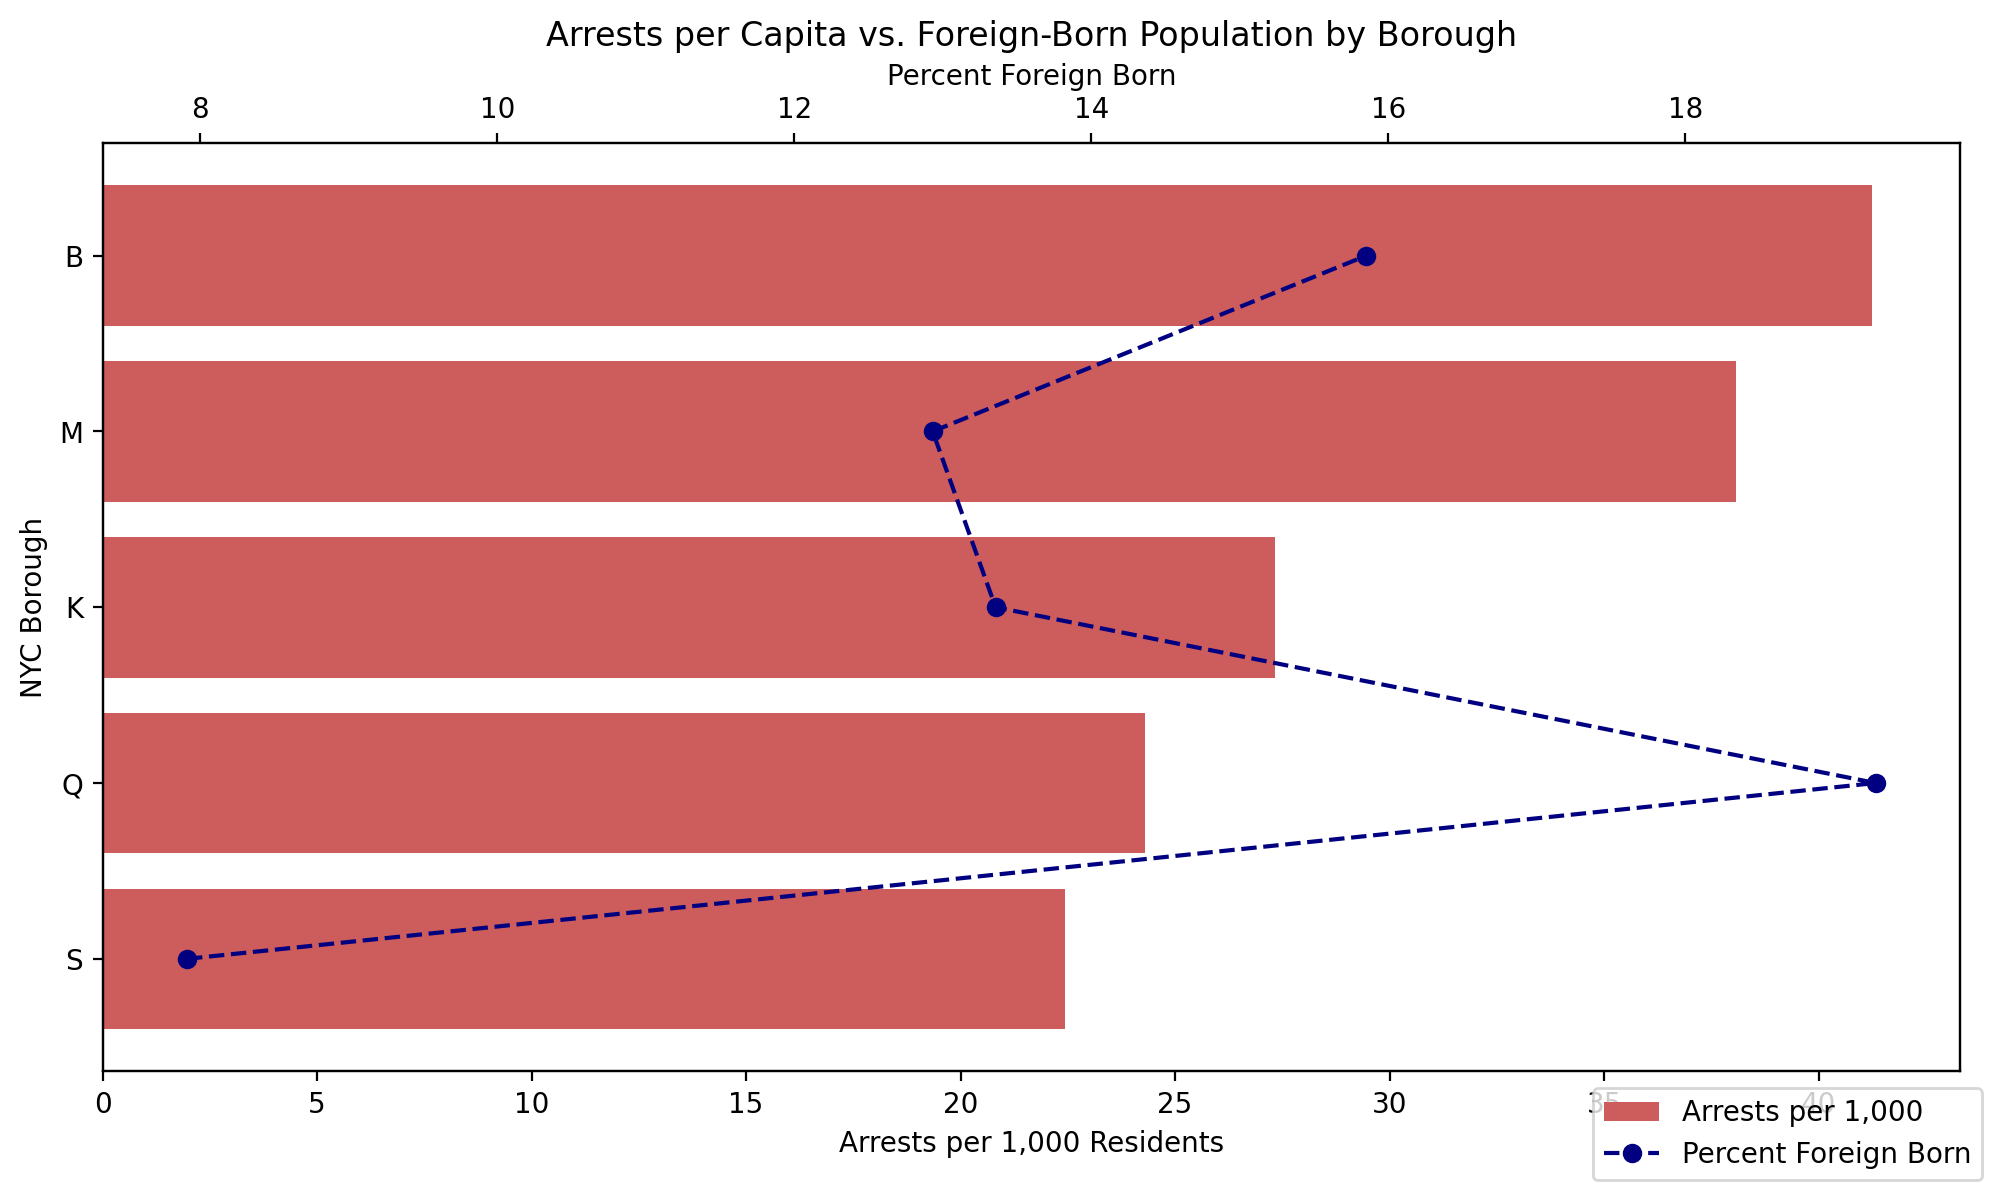

In [30]:
import matplotlib.pyplot as plt

# Sort by arrests per 1,000
borough_df_sorted = borough_df.sort_values('arrests_per_1000', ascending=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Arrests per 1,000 bars
bars = ax1.barh(
    borough_df_sorted['arrest_boro'],
    borough_df_sorted['arrests_per_1000'],
    color='indianred',
    label='Arrests per 1,000'
)
ax1.set_xlabel("Arrests per 1,000 Residents")
ax1.set_ylabel("NYC Borough")
ax1.set_title("Arrests per Capita vs. Foreign-Born Population by Borough")

# Add a second axis for foreign-born percent
ax2 = ax1.twiny()
ax2.plot(
    borough_df_sorted['pct_foreign_born']*100,
    borough_df_sorted['arrest_boro'],
    'o--',
    color='navy',
    label='Percent Foreign Born'
)
ax2.set_xlabel("Percent Foreign Born")

# Show both legends
fig.legend(loc='lower right')
plt.tight_layout()
plt.savefig('foreign and arrests per borough.png')
plt.show()


# Conclusion

Our analysis shows that despite variation among the boroughs with median income, it is consistent that lower income and communities of color experience disproportionately higher arrest rates, supporting previous literature and research that suggests structural inequality impacts policing outcomes. Our precinct-level analysis of Manhattan showed that there are significant differences in arrest rates that correlate with the socioeconomic characteristics of the boroughs. Our Queens analysis shows racial disparities in arrest patterns, as well as the age group that showed the highest concentration of arrests across these categories. Our Staten Island analysis highlighted how the 120th precinct has higher arrest rates, especially for Black and Hispanic individuals, showing a clear spatial concentration of arrests and suggesting targeted police enforcement practices. Our immigration and crime rate analysis provides evidence of how neighborhood demographics correlate with policing practices. These findings show that arrest rates do not reflect individual precincts but point to systemic inequities that extend beyond individual action. For future research, we would like to analyze these patterns over time as well as identify policing methods such as surveillance and analyze their correlation.

# References
[1] Arthur Pressman Law. (n.d.). The connection between poverty and drug crime in New York. Arthur Pressman Attorney at Law. Retrieved May 12, 2025, from https://www.arthurpressmanlaw.com/the-connection-between-poverty-and-drug-crime-in-new-york/

[2] ArcGIS StoryMaps. (n.d.). NYC: Arrests and inequality. Esri. Retrieved May 12, 2025, from https://storymaps.arcgis.com/stories/0f903cebe76b461fb654271067c5fe53

[3] Mac Donald, H. (2023, July 14). Poverty and violent crime don’t go hand in hand. City Journal. https://www.city-journal.org/article/poverty-and-violent-crime-dont-go-hand-in-hand

[4] Furman Center. (2020, December 2). Focus on poverty. NYU Furman Center. https://furmancenter.org/thestoop/entry/focus-on-poverty
[5] Prison Policy Initiative. (2014, May 28). Breaking down mass incarceration in the 2010 Census: State-by-state incarceration rates by race/ethnicity. https://www.prisonpolicy.org/reports/rates.html
[6] Fagan, J., & Davies, G. (2012). Crime and enforcement in immigrant neighborhoods: Evidence from New York City. The Annals of the American Academy of Political and Social Science, 641(1), 82–107. https://www.jstor.org/stable/23218825

[7] Data Collaborative for Justice. (2024, February). Racial and neighborhood disparities in New York City criminal summons practices.
https://datacollaborativeforjustice.org/work/policing/racial-disparities-in-new-york-city-criminal-summonses-2019-2022/

[8] NYU Furman Center. (2016). Focus on poverty in New York City.
https://furmancenter.org/files/sotc/SOC_2016_FOCUS_Poverty_in_NYC.pdf

[9] Brennan Center for Justice. (2023, March 15). New data on poverty and criminal records in New York State.
https://www.brennancenter.org/our-work/analysis-opinion/new-data-poverty-and-criminal-records-new-york-state

[10] Hesse, M. (2022, March 11). The meaning of a stolen diaper. The New Yorker.
https://www.newyorker.com/news/our-local-correspondents/the-meaning-of-a-stolen-diaper

[11] New York City Council. (n.d.). Fix the system – Data team.
https://council.nyc.gov/data/fix-the-system/

[12] NYPD Federal Monitor. (2024, April 11). Twentieth report of the independent monitor: Racial disparities in NYPD stops.
https://www.nypdmonitor.org/wp-content/uploads/2024/04/2024.04.11-927-1-Twentieth-Report.pdf

[13] Hipp, J. R. (2011). Spreading the wealth: The effect of the distribution of income and race/ethnicity across households and neighborhoods on city crime trajectories. Criminology, 49(3), 631-665. https://doi.org/10.1111/j.1745-9125.2011.00238.x

[14] McNamara, R. (2024). Beyond Crime: Considering the Impact of Wealth and Politics on Juvenile Arrest Rates in Michigan (Doctoral dissertation, University of Michigan).

[15] Hayes, J., & Raphael, S. (2019). Key Factors in Arrest Trends and Differences in California’s Counties.

[16] Davies, G., & Fagan, J. (2012). Crime and enforcement in immigrant neighborhoods: Evidence from New York City. The Annals of the American Academy of Political and Social Science, 641(1), 99-124.
